***Risque de defaut d'entreprise***
Outhmane Itro & Yassine Ettachfini

Cette partie concerne la partie 3.2 du rapport ( perte associée au défaut )

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import scipy as sp
import seaborn as sns
import matplotlib

# Pour les barres de chargement
from tqdm.notebook import tqdm, trange

# Setting plotting style
sns.set_style("darkgrid")
matplotlib.rcParams.update({'font.size': 18})

In [2]:
#Quel paramètre de décalage choisir pour ISa , celui qui minimise la variance asymptotique pour tous les k (en moyenne)
N = 20 # Nombre entreprise
S0 = 100   # Valeur initiale des entreprises 
sigma = 0.4
M = int(1e4)
B = 36
rho=0.4
mean = (1/sigma)*np.log(B*np.exp(0.5*sigma*sigma)/S0)
plt.figure(figsize=(15,7))
Mat_cov = (1-rho)*np.identity(N) +rho*np.ones((N,N)) 
Mat_cov_inv = np.linalg.inv(Mat_cov)

#On adapte la fonction VarAs pour qu'elle renvoie le lambda qui donne la variance asymptotique la plus petite
def min_VarAs(lambdas,k): #Lambdas est une liste np.linspace
    n = lambdas.size
    min_la = lambdas[0]
    for i in range(1,n):
        if VarAs(lambdas[i],k) < min_la:
            min_la = lambdas[i]
    return min_la

<Figure size 1080x504 with 0 Axes>

Tentative de calcul de E[Pt / L >= k] par Importance Sampling


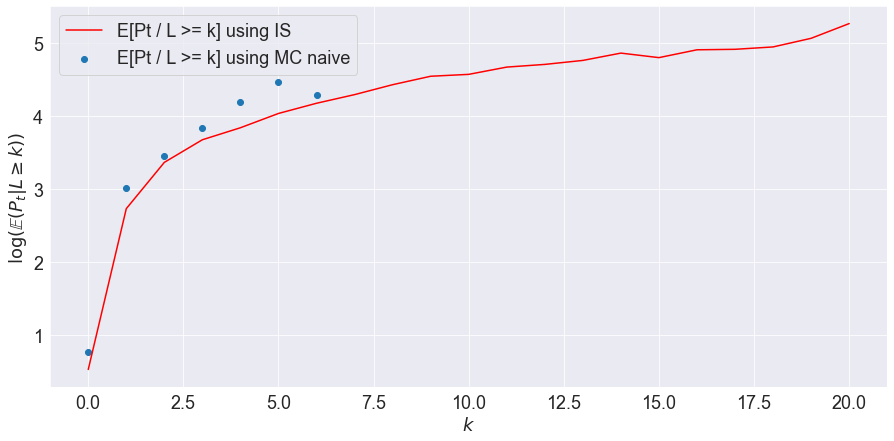

In [5]:
import scipy
from scipy.stats import mvn
N = 20 # Nombre entreprise
S0 = 100   # Valeur initiale des entreprises 
sigma = 0.4
M = int(1e4)
B = 36
rho=0.4
mean = (1/sigma)*np.log(B*np.exp(0.5*sigma*sigma)/S0)

plt.figure(figsize=(15,7))

Mat_cov = (1-rho)*np.identity(N) +rho*np.ones((N,N)) 

Mat_cov_inv = np.linalg.inv(Mat_cov)


def Probas(N):
    probas=[]
    A = -np.identity(N)
    vect = -mean*np.ones(N)
    probas.append(mvn.mvnun([-1000]*N,vect,np.zeros(N),A@Mat_cov@A)[0])
    for k in range(1,N+1):
        
        A[k-1][k-1] = 1
        vect[k-1] *= -1
        probas.append(mvn.mvnun([-1000]*N,vect,np.zeros(N),A@Mat_cov@A)[0]*scipy.special.binom(N,k))
        
    return probas
probas_ponctuels = Probas(N)
probas_ponctuels=np.array(probas_ponctuels)


W0 = np.array([mean]*N)   #Paramètre de décalage d'IS

p = sps.norm.cdf(mean)
espace = np.arange(-0.1,N)
fBin = sps.binom.sf(espace,N,p)
mean0 = 0
E_Pt_IS = []
E_Pt_MC = []
E_H = []
E_B = []
print("Tentative de calcul de E[Pt / L >= k] par Importance Sampling")
pbar = tqdm(total=N)
for k in range(N+1):
    
    W_MC = np.random.multivariate_normal(np.zeros(N),Mat_cov, size=M)
    W = np.random.multivariate_normal(W0,Mat_cov, size=M)
    L = np.sum(W <= mean,axis = 1)
    L_MC = np.sum(W_MC <= mean , axis=1)
    
    S = 0.3*S0*np.exp(-0.5*(sigma**2)+sigma*W)*(W <= mean)
    S_MC = 0.3*S0*np.exp(-0.5*(sigma**2)+sigma*W)*(W_MC <= mean)

    
    res = np.sum(S,axis=1)*(L >= k)*np.array([np.exp(0.5*(W0@Mat_cov_inv@(W0-W[i]) - W[i]@Mat_cov_inv@W0)) for i in range(M)])
    res_MC = np.sum(S_MC,axis=1)*(L_MC >= k)
    mu = np.mean(res)
    mu_MC = np.mean(res_MC)
    E_Pt_IS.append(mu/np.sum(FF[k:]))

    E_Pt_MC.append(mu_MC/np.sum(FF[k:]))
    pbar.update(1)
pbar.close()

for i in range(N+1):
    if E_Pt_IS[i] == 0.0:
        E_Pt_IS[i] = np.exp(2)
    if E_Pt_MC[i] == 0.0:
        E_Pt_MC[i] = np.exp(2)
    
E_Pt_IS = np.array(E_Pt_IS)
E_Pt_MC = np.array(E_Pt_MC)


log = True

plt.plot(range(N+1),log*np.log(E_Pt_IS)+(1-log)*E_Pt_IS,color='r',label="E[Pt / L >= k] using IS")
plt.scatter(range(7),log*np.log(E_Pt_MC[:7])+(1-log)*E_Pt_MC[:7],label="E[Pt / L >= k] using MC naive")
plt.xlabel(r'$k$')
if log:
    plt.ylabel(r'$\log(\mathbb{E}(P_t | L \geq k))$')
else :
    plt.ylabel(r'$\mathbb{E}(P_t | L \geq k)$')
plt.legend()
plt.show()

In [7]:
def VarAs(la,k): # lambda et k
    P_IS = 0
    PH = []
    PD = []

    mean0= np.array([la]*N)
    q = N
    mean0 = mean0 -0.01
    W= np.random.multivariate_normal(mean0,Mat_cov, size=M)
    L = np.sum(W <= mean,axis = 1)
    res = (L >= k)*np.array([np.exp(0.5*(mean0@Mat_cov_inv@(mean0-W[i]) - W[i]@Mat_cov_inv@mean0)) for i in range(M)])
    VarAs = np.std(res)
    return VarAs

nice
Tentative de calcul de E[Pt / L >= k] par Importance Sampling



[8.85706589e-01 7.73026400e-02 2.08753573e-02 8.08570881e-03
 3.72494899e-03 1.89386452e-03 1.02820129e-03 5.80911644e-04
 3.37049440e-04 1.96154126e-04 1.17057620e-04 6.91954439e-05
 4.09469440e-05 2.37598955e-05 1.31641301e-05 7.35090460e-06
 3.84590944e-06 1.77510302e-06 7.71679756e-07 2.57254448e-07
 6.43109871e-08]



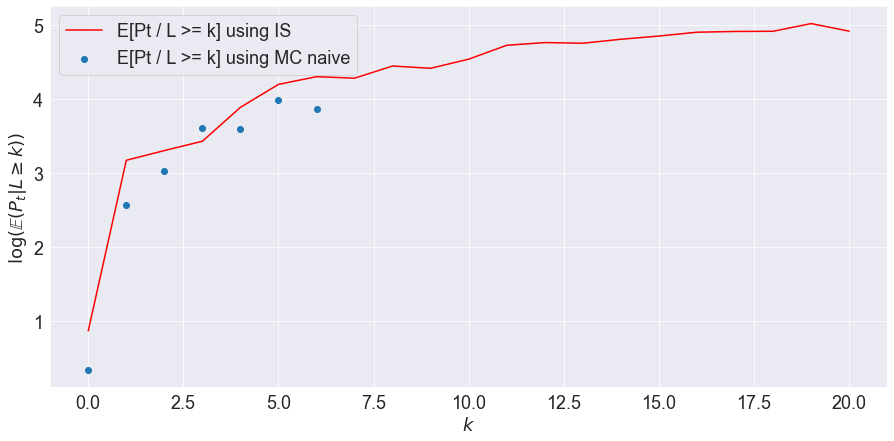

In [9]:
import scipy
from scipy.stats import mvn
N = 20 # Nombre entreprise
S0 = 100   # Valeur initiale des entreprises 
sigma = 0.4
M = int(1e4)
B = 36
rho=0.4
mean = (1/sigma)*np.log(B*np.exp(0.5*sigma*sigma)/S0)

plt.figure(figsize=(15,7))

Mat_cov = (1-rho)*np.identity(N) +rho*np.ones((N,N)) 

Mat_cov_inv = np.linalg.inv(Mat_cov)


def Probas(N):
    probas=[]
    A = -np.identity(N)
    vect = -mean*np.ones(N)
    probas.append(mvn.mvnun([-1000]*N,vect,np.zeros(N),A@Mat_cov@A)[0])
    for k in range(1,N+1):
        
        A[k-1][k-1] = 1
        vect[k-1] *= -1
        probas.append(mvn.mvnun([-1000]*N,vect,np.zeros(N),A@Mat_cov@A)[0]*scipy.special.binom(N,k))
        
    return probas
FF = Probas(N)
FF=np.array(FF)
print('nice')
#W= np.random.multivariate_normal(np.zeros(N),Mat_cov, size=M)

S = np.array([S0*np.exp(-0.5*sigma*sigma+sigma*W[i,:]) for i in range(M)])

lambdas = np.append(np.linspace(mean-1,0,25),np.array([mean]))

p = sps.norm.cdf(mean)
espace = np.arange(-0.1,N)
fBin = sps.binom.sf(espace,N,p)
mean0 = 0
E_Pt_IS = []
E_Pt_MC = []
E_H = []
E_B = []
print("Tentative de calcul de E[Pt / L >= k] par Importance Sampling")
pbar = tqdm(total=N)
for k in range(N+1):
    la_opt = min_VarAs(lambdas,k)
    W0 = np.array([la_opt]*N)
    #q = min(int(np.ceil(k*np.log(k+1))),N)  # à commenter si besoin
    #q = N  # à commenter si besoin
    #mean0 = -1/(1-k/(N+1)) # à commenter si besoin
    W_MC = np.random.multivariate_normal(np.zeros(N),Mat_cov, size=M)
    W = np.random.multivariate_normal(W0,Mat_cov, size=M)
    L = np.sum(W <= mean,axis = 1)
    L_MC = np.sum(W_MC <= mean , axis=1)
    #print(L.shape)
    S = 0.3*S0*np.exp(-0.5*(sigma**2)+sigma*W)*(W <= mean)
    S_MC = 0.3*S0*np.exp(-0.5*(sigma**2)+sigma*W)*(W_MC <= mean)
    #print(S.shape)
    
    res = np.sum(S,axis=1)*(L >= k)*np.array([np.exp(0.5*(W0@Mat_cov_inv@(W0-W[i]) - W[i]@Mat_cov_inv@W0)) for i in range(M)])
    res_MC = np.sum(S_MC,axis=1)*(L_MC >= k)
    mu = np.mean(res)
    mu_MC = np.mean(res_MC)
    E_Pt_IS.append(mu/np.sum(FF[k:]))
    #E_Pt_IS.append(mu)
    E_Pt_MC.append(mu_MC/np.sum(FF[k:]))
    '''si = np.std(res)*1.96*(1/np.sqrt(M))
    E_H.append(mu/fBin[k]+si)
    E_B.append(mu/fBin[k]-si)'''
    pbar.update(1)
pbar.close()

for i in range(N+1):
    if E_Pt_IS[i] == 0.0:
        E_Pt_IS[i] = np.exp(2)
    if E_Pt_MC[i] == 0.0:
        E_Pt_MC[i] = np.exp(2)
    if E_Pt_MC[i] - E_Pt_IS[i] >= 100 :
        E_Pt_MC[i] = 0 
    
E_Pt_IS = np.array(E_Pt_IS)
E_Pt_MC = np.array(E_Pt_MC)

print(FF)
log = True

plt.plot(range(N+1),log*np.log(E_Pt_IS)+(1-log)*E_Pt_IS,color='r',label="E[Pt / L >= k] using IS")
plt.scatter(range(7),log*np.log(E_Pt_MC[:7])+(1-log)*E_Pt_MC[:7],label="E[Pt / L >= k] using MC naive")
plt.xlabel(r'$k$')
if log:
    plt.ylabel(r'$\log(\mathbb{E}(P_t | L \geq k))$')
else :
    plt.ylabel(r'$\mathbb{E}(P_t | L \geq k)$')
plt.legend()
plt.show()